<a href="https://colab.research.google.com/github/najoua-elmansouf/ProblemSolving/blob/main/Copy_of_ProblemSolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
import numpy as np

In [5]:
dataset_path = '/student_data.csv'
student_df = pd.read_csv(dataset_path)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print(student_df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [7]:
student_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Cette table contient 33 colonnes

In [9]:
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_features)
print(len(numerical_features))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


On a 16 variables numériques et 14 variables catégoriques

In [10]:
print(student_df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [14]:
print("Le nombre de valeurs manquantes est : ")
print(student_df.isnull().sum().sum())

Le nombre de valeurs manquantes est : 
0


On n'a pas de valeurs manquantes

In [20]:
student_df = student_df.drop(columns=['school'])
print(student_df.columns.tolist())



['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'famsup', 'activities', 'internet', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']


In [22]:
print("La table contient maintenant ",len(student_df.columns.tolist()), " colonnes")
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = student_df.select_dtypes(include='object').columns.tolist()
print(numerical_features)
print("On a ",len(numerical_features)," variables numériques")
print(categorical_features)
print("On a ",len(categorical_features)," variables catégoriques")

La table contient maintenant  22  colonnes
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']
On a  12  variables numériques
['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'famsup', 'activities', 'internet']
On a  10  variables catégoriques


On a enlevé 8 variables qui n'ont pas de relation avec le contexte de notre étude. La table contient maintenant 12 variables numériques et 10 variables catégoriques.

# Transformation des variables catégoriques en des variables numériques

In [26]:
encoder = OneHotEncoder()

numerical_features_df = student_df.select_dtypes(include=['float64', 'int64'])
categorical_features_df = student_df.select_dtypes(include='object')

#application du onehotencoder afin de transformer les variables categoriques en des variables numériques
categorical_tonumerical_features = encoder.fit_transform(categorical_features_df).toarray()
encoded_columns = encoder.get_feature_names_out(categorical_features_df.columns)

# Create a DataFrame from the transformed categorical features with proper column names
categorical_tonumerical_df = pd.DataFrame(categorical_tonumerical_features, columns=encoded_columns)

# Concatenate numerical and transformed categorical features
student_df_encoded = pd.concat([numerical_features_df, categorical_tonumerical_df], axis=1)
student_df_encoded.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,reason_course,reason_home,reason_other,reason_reputation,famsup_no,famsup_yes,activities_no,activities_yes,internet_no,internet_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,...,0.367089,0.275949,0.091139,0.265823,0.387342,0.612658,0.491139,0.508861,0.167089,0.832911
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,...,0.482622,0.447558,0.288172,0.442331,0.487761,0.487761,0.500555,0.500555,0.373528,0.373528
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La nouvelle table contient 40 variables numériques

In [29]:
standarisation = StandardScaler()

student_data_standarise = pd.DataFrame(standarisation.fit_transform(student_df_encoded), columns=student_df_encoded.columns)


On a standarisé les données.

# Clustering hiérarchique

---






On va appliquer le clustering sur les variables en prenant comme critére de distance la corrélation entre les variables.

## Méthode average et métrique correlation

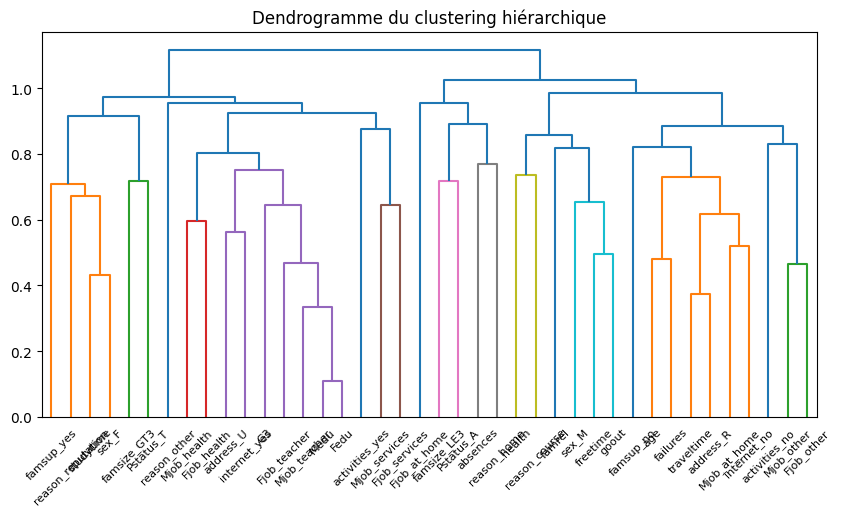

In [30]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [31]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.49631687547232184


## Méthode single et métrique correlation





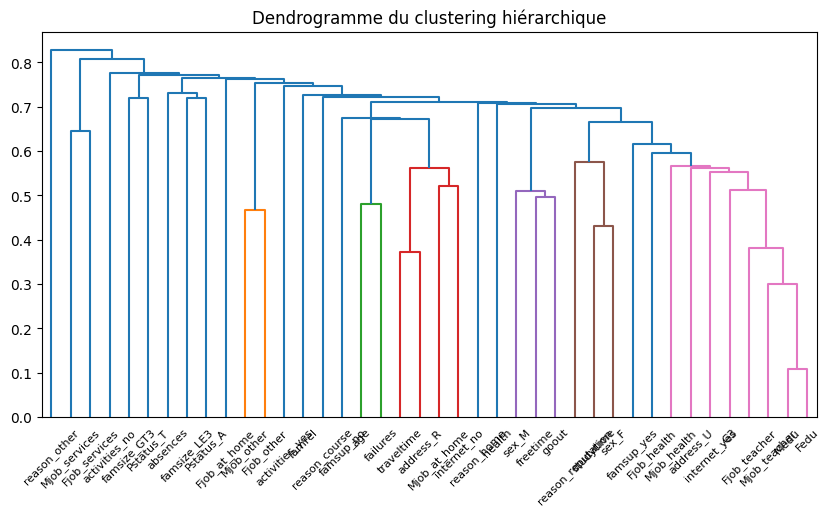

In [34]:
S = hierarchy.linkage(correlation_matrix, method='single', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(S, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()


In [35]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(S, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.29232860999485033


## Méthode complete et métrique correlation

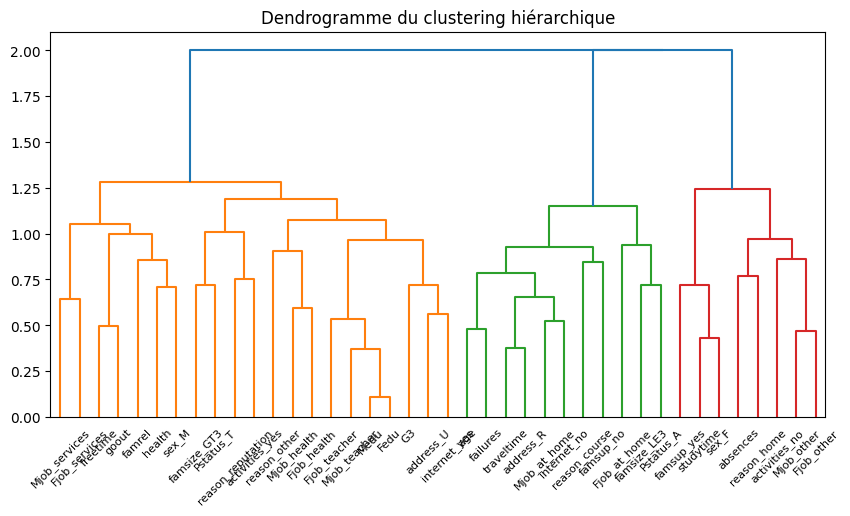

In [36]:
C = hierarchy.linkage(correlation_matrix, method='complete', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(C, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [37]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(C, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.42761743060569835


## Méthode ward et métrique euclidienne

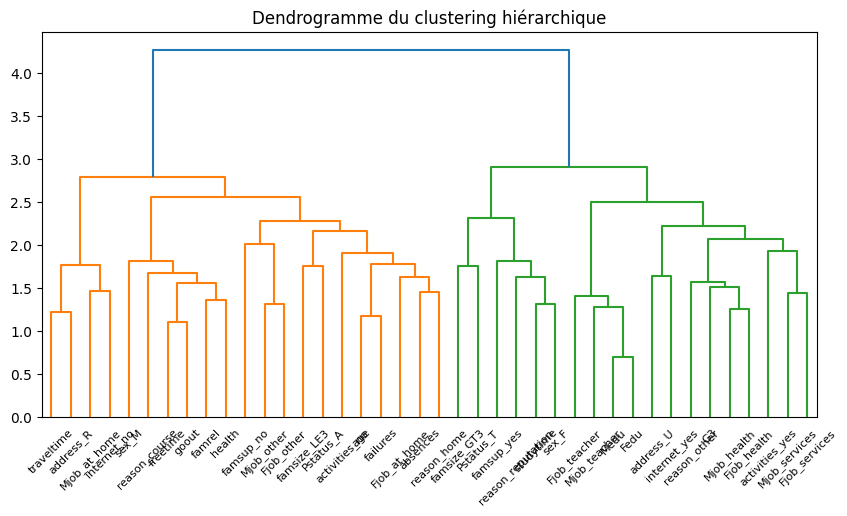

In [39]:
W = hierarchy.linkage(correlation_matrix, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(W, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [40]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(W, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.44944527021197517


## Méthode average et métrique euclidiénne

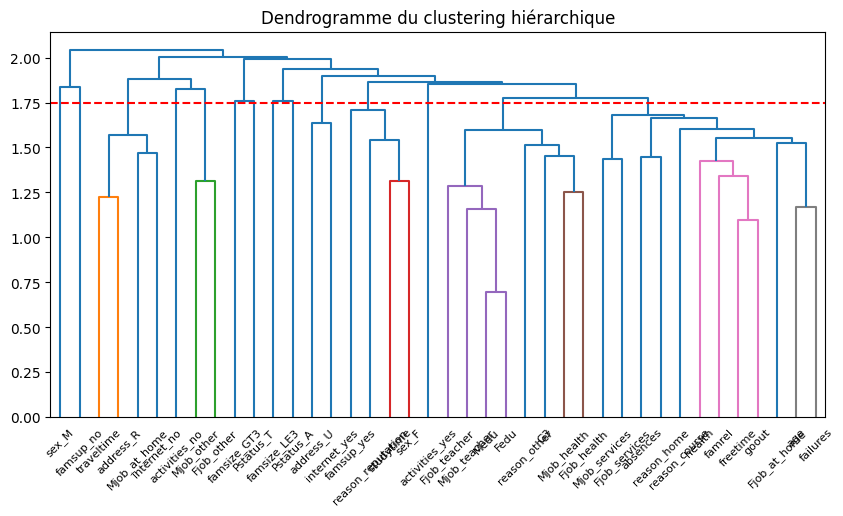

In [41]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.axhline(y= 1.75, color='r', linestyle='--')
plt.show()

In [42]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.6133357688397297


## Méthode average et métrique cosine

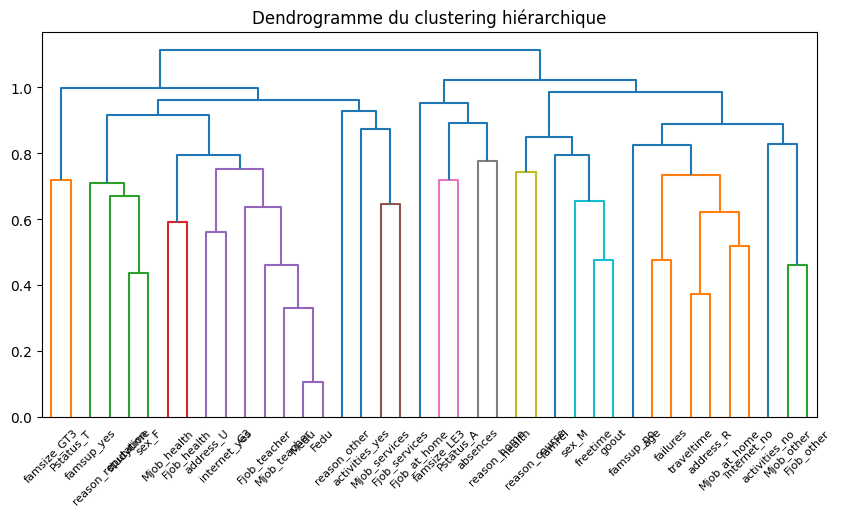

In [43]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='cosine')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [44]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.5012669453103374


**Inteprétation des résultats :**

*   En utilisant la méthode average et la métrique euclidienne on a eu un coefficient cophénétique de 0.61, qui est la plus grande valeur de ce coefficient parmis toutes les combinaisons.
*   Cette valeur de ce coefficient montre que le clustering résultant de cette combinaison refléte bien la distance réelle entre les variables.
*   Le but de ce clustering est de trouver les variables qui sont les plus corrélées à la variable G3 qui représente la note des étudiants, ceci dit le résultat du clustering montre que :

  *   Le travail de la mére (Mjob)
  *   Le travail du pére (Fjob)
  *   L'éducation de la mére (Medu)
  *   L'éducation du pére (Fedu)
  *   La raison du choix de l'université (reason)
  *   L'absence (absences)
  *   La santé (health)
  *   La qualité de la relation avec la famille (famrel)
  *   Le temps libre (freetime)
  *   S'amuser (goout)

Ces variables sont celles qui affectent la note des étudiants.










# Analyse en Composantes Principales (ACP)


In [73]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
dataset_path = '/student_data.csv'
student_df = pd.read_csv(dataset_path)

In [85]:
numeric_variables = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']
student_df_numeric = student_df[numeric_variables]

In [86]:
# Calculer la matrice de corrélation
correlation_matrix = student_df_numeric.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   
absences    0.175230  0.100285  0.024473   -0.012944  -0.062700  0.063726   

              famrel  freetime     goout    health  absences  
age         

Interprétation de la matrice de corrélation:

Age :

Corrélation négative avec le niveau d'éducation des parents et positive avec le nombre d'échecs.
Education de la mère (Medu) et Education du père (Fedu) :

Forte corrélation positive entre le niveau d'éducation de la mère et du père.
Corrélation négative avec le nombre d'échecs.
Travel Time (temps de déplacement) :

Plus longs temps de déplacement associés à un niveau d'éducation maternelle plus faible.
Study Time (temps d'étude) :

Corrélation négative avec le temps libre et les sorties.
Failures (échecs) :

Augmentation avec l'âge et corrélation négative avec le niveau d'éducation des parents.
Famrel (qualité de la relation familiale) :

Corrélation négative avec le nombre d'échecs.
Freetime (temps libre) :

Corrélation positive avec la qualité de la relation familiale et les sorties.
Goout (sorties avec des amis) :

Corrélation positive avec le temps libre.
Health (état de santé) :

Légère corrélation négative avec les sorties.
Absences :

Corrélation positive avec l'âge et le nombre d'échecs.

Résumé Statistique des Variables Numériques

In [76]:
# Obtenir le résumé statistique
summary_stats_numeric = student_df_numeric.describe()

# Afficher le résumé statistique
print(summary_stats_numeric)


              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout      health    absences  
count  395.000000  395.000000  395.000000  395.000000  395.000000  
mean     3.944304    3.235443    3.108861    3.554430    5.708861  
std      0.896659    0.998862    1.113278    1.390303    8.003096 

Test de significativité de la corrélation (p-value)

Analyse de la Corrélation entre les Variables et la Performance Académique (G3)

In [77]:
from scipy.stats import pearsonr

# Définir la variable cible
target_variable = 'G3'

# Calculer les corrélations et les p-values
correlation_results = {}
for variable in student_df_numeric.columns:
    corr, p_value = pearsonr(student_df_numeric[variable], student_df[target_variable])
    correlation_results[variable] = {'correlation': corr, 'p_value': p_value}

# Afficher les résultats
for variable, result in correlation_results.items():
    print(f"{variable}: Corrélation = {result['correlation']:.4f}, p-value = {result['p_value']:.4f}")


age: Corrélation = -0.1616, p-value = 0.0013
Medu: Corrélation = 0.2171, p-value = 0.0000
Fedu: Corrélation = 0.1525, p-value = 0.0024
traveltime: Corrélation = -0.1171, p-value = 0.0199
studytime: Corrélation = 0.0978, p-value = 0.0521
failures: Corrélation = -0.3604, p-value = 0.0000
famrel: Corrélation = 0.0514, p-value = 0.3086
freetime: Corrélation = 0.0113, p-value = 0.8227
goout: Corrélation = -0.1328, p-value = 0.0082
health: Corrélation = -0.0613, p-value = 0.2239
absences: Corrélation = 0.0342, p-value = 0.4973


Âge (age) : Corrélation légèrement négative, les étudiants plus âgés ont tendance à avoir des notes légèrement plus basses (p-value = 0.0013).

Éducation de la mère (Medu) : Corrélation positive modérée, les étudiants dont la mère a un niveau d'éducation plus élevé obtiennent généralement des notes plus élevées (p-value = 0.0000).

Éducation du père (Fedu) : Corrélation positive modérée, les étudiants dont le père a un niveau d'éducation plus élevé ont tendance à avoir des notes plus élevées (p-value = 0.0024).

Temps de trajet (traveltime) : Corrélation légèrement négative, les étudiants passant moins de temps à se rendre à l'école ont des notes légèrement plus élevées (p-value = 0.0199).

Temps d'étude (studytime) : Corrélation positive faible, les étudiants consacrant plus de temps aux études ont des notes légèrement plus élevées, mais la corrélation n'est pas très forte (p-value = 0.0521).

Échecs précédents (failures) : Corrélation négative forte, les étudiants avec moins d'échecs précédents ont tendance à avoir des notes plus élevées (p-value = 0.0000).

Qualité des relations familiales (famrel) : Corrélation faible et non significative (p-value = 0.3086).

Temps libre (freetime) : Corrélation faible et non significative (p-value = 0.8227).

Temps passé avec des amis (goout) : Corrélation légèrement négative, moins de temps passé avec des amis est associé à des notes légèrement plus élevées (p-value = 0.0082).

État de santé (health) : Corrélation faible et non significative (p-value = 0.2239).

Absences (absences) : Corrélation faible et non significative (p-value = 0.4973).

***Calcul des composantes principales***



In [78]:
# Importer les bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardiser les variables numériques
scaler = StandardScaler()
student_df_numeric_standardized = scaler.fit_transform(student_df_numeric)

# Initialiser l'objet PCA
pca = PCA()

# Appliquer PCA aux données standardisées
principal_components = pca.fit_transform(student_df_numeric_standardized)

# Créer un DataFrame pour visualiser les composantes principales
pca_columns = [f"PC{i+1}" for i in range(student_df_numeric.shape[1])]
principal_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Afficher la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :", explained_variance_ratio)

# Afficher la somme cumulative de la variance expliquée
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Somme cumulative de la variance expliquée :", cumulative_explained_variance)


Variance expliquée par chaque composante principale : [0.18036306 0.13456762 0.11350285 0.1007718  0.09105426 0.0842437
 0.07523541 0.06929043 0.05944558 0.05898224 0.03254305]
Somme cumulative de la variance expliquée : [0.18036306 0.31493068 0.42843352 0.52920533 0.62025959 0.70450329
 0.7797387  0.84902913 0.90847471 0.96745695 1.        ]


Les deux premières composantes principales expliquent ensemble environ 31.49% de la variance totale, tandis que les cinq premières composantes principales expliquent environ 70.45%. Cela suggère que l'utilisation des 6 premières composantes principales peut capturer une proportion significative de la variabilité des données,

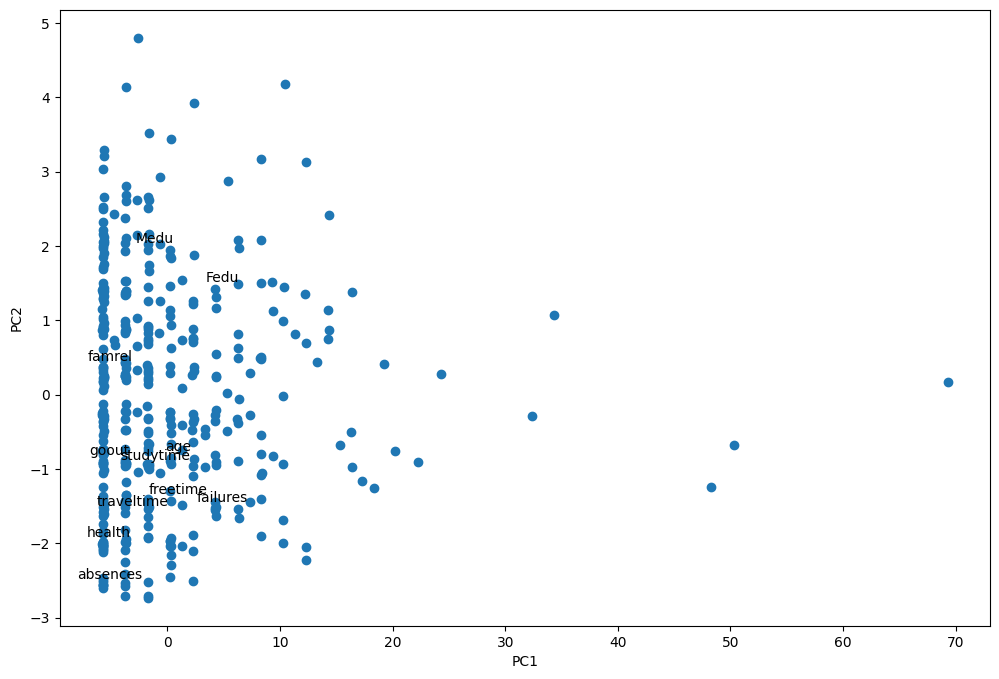

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Supposons que vous avez déjà standardisé vos données et obtenu student_df_numeric

# Initialiser l'objet PCA
pca = PCA()

# Ajuster le modèle aux données
principal_components = pca.fit_transform(student_df_numeric)

# Créer un DataFrame pour les composantes principales
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
principal_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Afficher les représentations graphiques des variables
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(principal_df['PC1'], principal_df['PC2'])  # Vous pouvez ajuster PC1 et PC2 selon vos besoins

# Annoter chaque point avec le nom de la variable
for variable, (pc1, pc2) in zip(student_df_numeric.columns, principal_df[['PC1', 'PC2']].values):
    ax.annotate(variable, (pc1, pc2), textcoords="offset points", xytext=(5,5), ha='center')

# Ajouter des étiquettes aux axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Afficher le graphe
plt.show()


Les variables qui sont proches l'une de l'autre sur le graphique ont des structures similaires dans les données originales. Les points alignés indiquent une forte corrélation entre les deux variables correspondantes. De plus, les variables dont les points sont éloignés les uns des autres sur le graphique ont des structures différentes ou sont moins corrélées.

Cercle de correlation

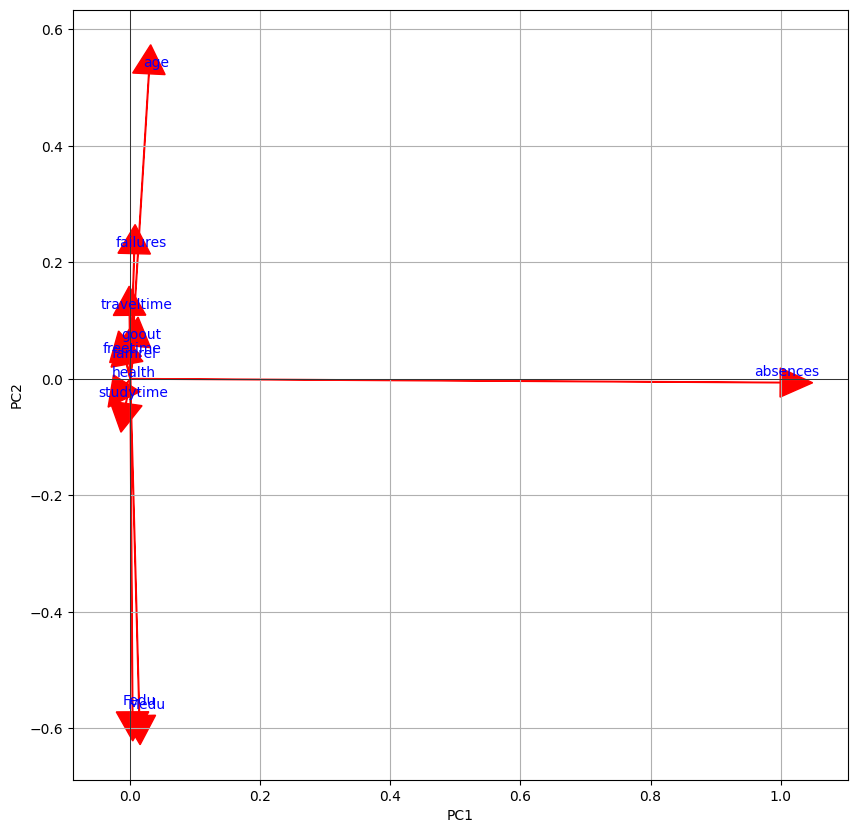

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que vous avez déjà standardisé vos données et obtenu student_df_numeric

# Initialiser l'objet PCA
pca = PCA()

# Ajuster le modèle aux données
pca.fit(student_df_numeric)

# Obtenir les composantes principales
pca_components = pca.components_

# Créer un DataFrame pour les composantes principales
pca_columns = [f'PC{i+1}' for i in range(pca_components.shape[0])]
pca_df = pd.DataFrame(data=pca_components.T, columns=pca_columns, index=student_df_numeric.columns)

# Créer le cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les flèches représentant les variables originales
for variable in pca_df.index:
    ax.arrow(0, 0, pca_df.loc[variable, 'PC1'], pca_df.loc[variable, 'PC2'], head_width=0.05, head_length=0.05, fc='red', ec='red')
    ax.annotate(variable, (pca_df.loc[variable, 'PC1'], pca_df.loc[variable, 'PC2']), textcoords="offset points", xytext=(5,5), ha='center', color='blue')

# Ajouter des lignes de grille pour faciliter l'interprétation
ax.grid(True)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

# Ajouter des étiquettes aux axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Afficher le cercle de corrélation
plt.show()


PC1 (Première composante principale) :

La variable absences a une charge factorielle significativement élevée sur PC1 (0.4244), indiquant une forte corrélation entre PC1 et le nombre d'absences.
Les variables age, Medu, Fedu, traveltime, studytime, failures, freetime, goout, et health ont également des contributions positives, bien que moins importantes.
PC2 (Deuxième composante principale) :

La variable Medu a la charge factorielle la plus élevée sur PC2 (-0.2121), indiquant une forte corrélation négative entre PC2 et l'éducation de la mère.
Les variables Fedu et failures ont également des contributions significatives, mais de signes opposés.

**Interprétation générale des composantes principales :**

Les résultats de l'analyse en composantes principales (ACP) mettent en évidence des relations importantes entre les variables et la performance des étudiants (représentée par la variable G3). Voici une interprétation générale des deux premières composantes principales :
PC1 (Première composante principale) :
La PC1 semble être principalement influencée par des facteurs tels que le nombre d'absences, l'âge, l'éducation des parents,le temps d'étude, les échecs antérieurs, le temps libre, les sorties, , la santé La variable "traveltime" (temps de trajet entre le domicile et l'école) semble jouer un rôle significatif dans la performance scolaire des étudiants, en particulier en relation avec la PC1 (Première composante principale).
Cette corrélation positive suggère que les étudiants qui doivent faire face à des temps de trajet plus longs ont tendance à présenter des niveaux plus élevés d'absences et d'autres facteurs associés à une performance scolaire moindre. En considérant cela, la construction de logements universitaires pourrait contribuer à réduire le temps de trajet pour un certain nombre d'étudiants, potentiellement améliorer leur présence en classe, réduire les absences, et ainsi favoriser de meilleures performances académiques.
La PC2 montre une forte corrélation négative avec l'éducation de la mère (Medu), ce qui signifie que des valeurs plus élevées sur PC2 sont associées à une éducation maternelle moins élevée. De plus, les variables "Fedu" (éducation du père) et "failures" (échecs antérieurs) ont des contributions significatives, mais de manière opposée. Ainsi, les étudiants avec des éducations maternelles plus faibles, des éducations paternelles plus faibles et moins d'échecs antérieurs tendent à avoir des valeurs plus élevées sur PC2.